# Doğrusal Regresyon Egzersizleri

50 adet Startup'ın araştırma ve geliştirmeye yönelik harcaması, yönetime yönelik harcaması, pazarlama harcaması, kazandıkları kar miktarı ve kuruldukları lokasyon bilgisi bulunmaktadır. Amaç kar miktarını tahmin etmektir. Bu bir sayısal tahmin problemidir ve bağımlı değişkenimiz "Profit".

Numpy, matplotlib.pyplot, pandas ve seaborn kütüphanelerini çekirdeğe dahil edelim.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Dizinde bulunan veri çerçevemizi startups değişkenine atayalım. startups değişkenini df değişkenine kopyalayarak kullanmaya başlayalım.

In [2]:
startups = pd.read_csv("../input/50-startupsdataset/50_Startups.csv")
df = startups.copy()
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


İlk 5 gözlemini yazdıralım.

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Veri çerçevesinin bilgilerini görüntüleyelim.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Kaç gözlem ve öznitelikten oluştuğunu görüntüleyelim.

In [5]:
df.shape

(50, 5)

Eksik verileri kontrol edelim.

In [6]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

Korelasyon matrisi çizdirelim.

In [7]:
corr = df.corr()
corr

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


Seaborn ile korelasyon matrisinin ısı haritasını çizdirelim.

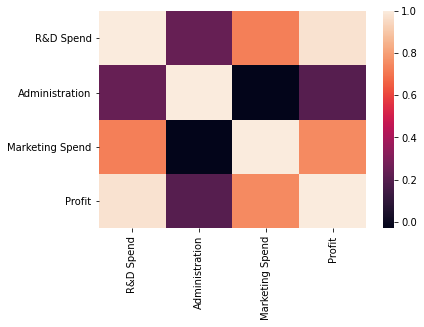

In [8]:
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values);

R&D Spend ve Profit arasındaki korelasyonu daha iyi görebilmek için scatterplot çizdirelim.

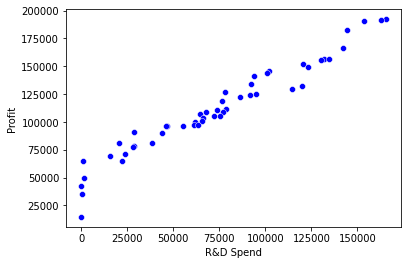

In [9]:
sns.scatterplot(x="R&D Spend",y="Profit",data=df,color="blue");

Sayısal değişkenlerin dağılımını görmek için df üzerinden histogram çizdirelim.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


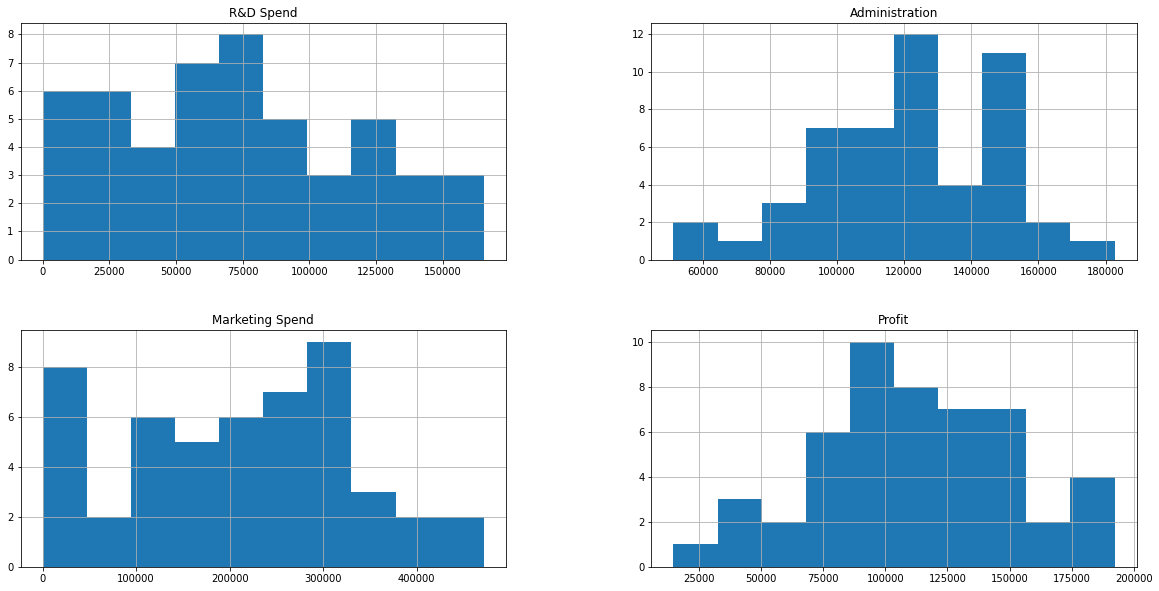

In [10]:
df.hist(figsize=(20,10))
plt.show()

Veri çerçevesinin temel istatistik değerlerini görüntüleyelim.

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


State'a ait benzersiz değerleri görüntüleyelim.

In [12]:
df["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

get_dummies yardımıyla State'a dair kategorik öznitelik çıkarımlarında bulunalım. Çünkü State'ların birbirine üstünlüğü yok, nominaller. Ordinal değil.

In [13]:
df_State = pd.get_dummies(["State"])

In [14]:
dfDummies = pd.get_dummies(df["State"],prefix="State")

In [15]:
dfDummies

,State_California,State_Florida,State_New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [16]:
df=pd.concat([df,dfDummies],axis=1)

State özniteliğini silip dummy olarak yaratılan State'lardan da birisini hariç tutarak veri çerçevemizi güncelleyelim.

In [17]:
df=df.drop(["State"],axis=1)
df=df.drop(["State_California"],axis=1)

In [18]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


Veri çerçevemizi bağımlı ve bağımsız değişkenler olmak üzere bölütleyelim.

In [19]:
X = df.drop("Profit",axis=1)
y=df["Profit"]

Bağımlı ve bağımsız değişkenleri kontrol edelim.

In [20]:
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [21]:
X

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0
5,131876.90,99814.71,362861.36,0,1
6,134615.46,147198.87,127716.82,0,0
7,130298.13,145530.06,323876.68,1,0
8,120542.52,148718.95,311613.29,0,1
9,123334.88,108679.17,304981.62,0,0


Bu bağımlı ve bağımsız değişkenlerden train ve test olmak üzere 4 parça oluşturalım. Bunu yapmak için train_test_split kullanalım.

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=50)

4 parça değişkeni kontrol edelim.

In [24]:
X_train

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
17,94657.16,145077.58,282574.31,0,1
47,0.00,135426.92,0.00,0,0
20,76253.86,113867.30,298664.47,0,0
40,28754.33,118546.05,172795.67,0,0
44,22177.74,154806.14,28334.72,0,0
26,75328.87,144135.98,134050.07,1,0
27,72107.60,127864.55,353183.81,0,1
28,66051.52,182645.56,118148.20,1,0
14,119943.24,156547.42,256512.92,1,0
43,15505.73,127382.30,35534.17,0,1


In [25]:
X_test

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
34,46426.07,157693.92,210797.67,0,0
36,28663.76,127056.21,201126.82,1,0
1,162597.70,151377.59,443898.53,0,0
38,20229.59,65947.93,185265.10,0,1
8,120542.52,148718.95,311613.29,0,1
16,78013.11,121597.55,264346.06,0,0
35,46014.02,85047.44,205517.64,0,1
13,91992.39,135495.07,252664.93,0,0
29,65605.48,153032.06,107138.38,0,1
24,77044.01,99281.34,140574.81,0,1


In [26]:
y_train

17    125370.37
47     42559.73
20    118474.03
40     78239.91
44     65200.33
26    105733.54
27    105008.31
28    103282.38
14    132602.65
43     69758.98
7     155752.60
31     97483.56
2     191050.39
5     156991.12
22    110352.25
42     71498.49
37     89949.14
6     156122.51
4     166187.94
30     99937.59
33     96778.92
45     64926.08
11    144259.40
32     97427.84
48     35673.41
Name: Profit, dtype: float64

In [27]:
y_test

34     96712.80
36     90708.19
1     191792.06
38     81229.06
8     152211.77
16    126992.93
35     96479.51
13    134307.35
29    101004.64
24    108552.04
18    124266.90
46     49490.75
12    141585.52
23    108733.99
25    107404.34
3     182901.99
39     81005.76
15    129917.04
41     77798.83
19    122776.86
49     14681.40
0     192261.83
9     149759.96
10    146121.95
21    111313.02
Name: Profit, dtype: float64

LinearRegression'u çekirdeğe dahil edip modeli inşa edelim.

In [28]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

Modeli eğitmek için bağımlı bağımsız değişkenlerden oluşturulan eğitim verilerini verelim.

In [29]:
model = lm.fit(X_train,y_train)

Modele daha önce görmediği bağımlı test değişkenini tahmin ettirelim. Bu tahmin değerlerimizi y_pred değişkenine atayalım.

In [30]:
y_pred=model.predict(X_test)
y_pred

array([ 90020.71395612,  73962.50681358, 186848.9339442 ,  69093.18786119,
       148799.1218115 , 116938.10760369,  89341.23450773, 127289.97928985,
       100728.43704373, 111786.73366746, 125987.79995605,  55073.69291754,
       126255.13021179, 107431.80467113, 103022.00124533, 169918.01479501,
        84787.52904764, 143515.02512232,  73498.60168628, 114484.43704689,
        50632.14985433, 188047.23229123, 153763.61286441, 132475.82098223,
       115333.8285078 ])

Tahminleri ve gerçek değerleri bir veri çerçevesinde toplayıp üzerinde göz gezdirelim.

In [31]:
df = pd.DataFrame({"Gercek Değerler":y_test,"Tahmin edilen değerler":y_pred,"y_pred ve y_test farkı":abs(y_pred-y_test)})

In [32]:
df

,Gercek Değerler,Tahmin edilen değerler,y_pred ve y_test farkı
34,96712.80,90020.713956,6692.086044
36,90708.19,73962.506814,16745.683186
1,191792.06,186848.933944,4943.126056
38,81229.06,69093.187861,12135.872139
8,152211.77,148799.121811,3412.648189
16,126992.93,116938.107604,10054.822396
35,96479.51,89341.234508,7138.275492
13,134307.35,127289.979290,7017.370710
29,101004.64,100728.437044,276.202956
24,108552.04,111786.733667,3234.693667


sklearn bünyesinde barınan metrics'i çekirdeğe dahil edelim ve MAE, MSE, RMSE değerlerini görüntüleyelim.

In [33]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test,y_pred)
MAE

8190.474247043149

In [34]:
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error(y_test,y_pred)
MSE

119765226.50826782

In [35]:
RMSE = np.sqrt(MSE)
RMSE

10943.730008926015

Modelin R Squared değerini eğitim verileri üzerinden yazdıralım.

In [36]:
model.score(X_train,y_train)

0.9683956286329349

Dileyenler statsmodel kullanarak hangi özniteliklerin model için %95 güvenilirlikle ne kadar anlamlı olup olmadığına da bakabilir. Modelde bazı feature selection işlemleri yaparak tekrardan eğitip yeni sonuçlar mukayese edilebilir.

In [37]:
import statsmodels.api as sm
stmodel = sm.OLS(y,X).fit()

In [38]:
stmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              727.1
Date:                Sun, 13 Jun 2021   Prob (F-statistic):                    7.87e-42
Time:                        21:41:38   Log-Likelihood:                         -545.15
No. Observations:                  50   AIC:                                      1100.
Df Residuals:                      45   BIC:                                      1110.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.7182      0.066     10.916      0.000       0.586       0.851
Administration      0.3113      0.035      8.885      0.000       0.241       0.382
Marketing Spend     0.0786      0.023      3.429      0.001       0.032       0.125
State_Florida    3464.4536   4905.406      0.706      0.484   -6415.541    1.33e+04
State_New York   5067.8937   4668.238      1.086      0.283   -4334.419    1.45e+04
==============================================================================
Omnibus:                        1.355   Durbin-Watson:                   1.288
Prob(Omnibus):                  0.508   Jarque-Bera (JB):                1.241
Skew:                          -0.237   Prob(JB):                        0.538
Kurtosis:                       2.391   Cond. No.                     8.28e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""